In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# authenticate
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_players = pd.read_excel('/content/drive/My Drive/AusBoomers/aus_boomers_players.xlsx')
df_players.head()

,Name,ProballerID,Position,Shoots,Height,Weight,DOB,G,PTS,TRB,AST,FG%,FG3%,FT%,eFG%,PER,WS,Comp
0,Mitch Creek,7803,SF,R,196,97.0,1992-04-27,5.0,4.2,2.4,1.2,50.0,0.0,71.4,50.0,20.2,0.2,NBA
1,Ben Simmons,56765,PG,L,211,108.0,1996-07-20,242.0,16.3,8.3,8.0,56.0,10.0,60.1,56.1,20.1,27.2,NBA
2,Patty Mills,47394,PG,R,185,81.0,1988-08-11,698.0,8.9,1.7,2.3,43.2,39.0,85.6,54.1,14.5,31.8,NBA
3,Aron Baynes,37144,C,R,208,117.0,1986-12-09,494.0,5.9,4.6,0.8,49.0,30.9,80.0,51.0,13.8,19.4,NBA
4,Joe Ingles,47393,SF,L,203,NaN,1987-10-02,503.0,8.5,3.2,3.7,45.1,41.0,76.1,58.0,12.7,30.7,NBA


In [4]:
df_stats = pd.read_excel('/content/drive/My Drive/AusBoomers/aus_boomers_proballer_stats.xlsx')
df_stats.head()

,Season,Age,League,Team,GP,MIN,FG%,3%,1%,MIN.1,Dr,Reb,Ast,Stl,Blk,Pts,Eff,Source,Name
0,10-11,18,AUS-1,Adelaide 36ers,20,16.5,47.8,15.4,67.5,1.0,1.4,2.4,1.0,0.6,0.4,5.9,5.8,list-regular,Mitch Creek
1,11-12,19,AUS-1,Adelaide 36ers,28,15.0,44.5,33.3,55.2,1.4,1.6,3.0,1.2,0.4,0.2,5.4,6.0,list-regular,Mitch Creek
2,12-13,20,AUS-1,Adelaide 36ers,12,14.7,65.9,28.6,59.1,0.8,1.8,2.6,0.5,0.8,0.3,5.8,7.3,list-regular,Mitch Creek
3,13-14,21,AUS-1,Adelaide 36ers,27,16.7,50.9,36.1,69.6,1.3,2.8,4.1,1.1,0.6,0.4,8.3,9.8,list-regular,Mitch Creek
4,14-15,22,AUS-1,Adelaide 36ers,24,23.4,51.0,21.7,68.6,1.5,2.8,4.3,1.5,0.9,0.3,11.4,11.7,list-regular,Mitch Creek


## WNBL code


In [5]:
# how does published Eff compare with ad-hoc EFF.Calc value?

da = df_stats

# missing TO
# per-game & percentages available only
da['EFF.Calc'] = da['Pts'] + da['Reb'] + da['Ast'] + da['Stl'] + da['Blk'] + da['FG%']/100.0 + da['3%']/100.0 + da['1%']/100



In [6]:
# construct year from season label
da['Year'] = "20" + da['Season'].str[:2]
da['Year'] = pd.to_numeric(da['Year'])

In [7]:
da.head()

,Season,Age,League,Team,GP,MIN,FG%,3%,1%,MIN.1,Dr,Reb,Ast,Stl,Blk,Pts,Eff,Source,Name,EFF.Calc,Year
0,10-11,18,AUS-1,Adelaide 36ers,20,16.5,47.8,15.4,67.5,1.0,1.4,2.4,1.0,0.6,0.4,5.9,5.8,list-regular,Mitch Creek,11.607,2010
1,11-12,19,AUS-1,Adelaide 36ers,28,15.0,44.5,33.3,55.2,1.4,1.6,3.0,1.2,0.4,0.2,5.4,6.0,list-regular,Mitch Creek,11.530,2011
2,12-13,20,AUS-1,Adelaide 36ers,12,14.7,65.9,28.6,59.1,0.8,1.8,2.6,0.5,0.8,0.3,5.8,7.3,list-regular,Mitch Creek,11.536,2012
3,13-14,21,AUS-1,Adelaide 36ers,27,16.7,50.9,36.1,69.6,1.3,2.8,4.1,1.1,0.6,0.4,8.3,9.8,list-regular,Mitch Creek,16.066,2013
4,14-15,22,AUS-1,Adelaide 36ers,24,23.4,51.0,21.7,68.6,1.5,2.8,4.3,1.5,0.9,0.3,11.4,11.7,list-regular,Mitch Creek,19.813,2014


In [8]:
tmp = da[da['Source']=="list-regular"].Name.unique()
len(tmp)

24

In [9]:
# current regular season stats
df1 = da[da['Source']=="list-regular"]
df2 = df1.groupby(["Name"]).apply(lambda x: x.sort_values(["Year"], ascending = False)).reset_index(drop=True)
dc = df2.groupby('Name').head(1)

In [10]:
dt = dc[['Season','Age','League','Team','Name']]

In [11]:
# concatenate current team with player
tmp = da[['Year','Season','Name','Eff']]
tmp = tmp.merge(dt,on='Name')

dp = df_players[['Name','Position','Height']]
tmp = tmp.merge(dp,on='Name')

tmp['Player-Team'] = tmp['Name'] + '\n(' + tmp['Team'] + ') ' + '\n Pos: ' + tmp['Position'] + ' '+ ' Height: ' + tmp['Height'].astype('str') + ' '

In [12]:
# calculate mean for given year
tmp = tmp.groupby(['Name','Year','Player-Team','Position'],as_index=False).mean()

In [13]:
tmp.Position.unique()

array(['C', 'PG', 'PF', 'SG', 'SF'], dtype=object)

In [14]:
# order player positions
t = pd.CategoricalDtype(categories=['PG', 'SG', 'SF', 'PF', 'C'], ordered=True)
tmp['sort']=pd.Series(tmp.Position, dtype=t)
tmp.sort_values(by=['sort','Name','Height'],ascending=[True,True,True],ignore_index=True,inplace=True)

In [15]:
tmp.head()

,Name,Year,Player-Team,Position,Eff,Age,Height,sort
0,Ben Simmons,2012,Ben Simmons\n(Philadelphia 76ers) \n Pos: PG ...,PG,11.9,24,211,PG
1,Ben Simmons,2014,Ben Simmons\n(Philadelphia 76ers) \n Pos: PG ...,PG,24.0,24,211,PG
2,Ben Simmons,2017,Ben Simmons\n(Philadelphia 76ers) \n Pos: PG ...,PG,23.6,24,211,PG
3,Ben Simmons,2018,Ben Simmons\n(Philadelphia 76ers) \n Pos: PG ...,PG,23.1,24,211,PG
4,Ben Simmons,2019,Ben Simmons\n(Philadelphia 76ers) \n Pos: PG ...,PG,24.6,24,211,PG


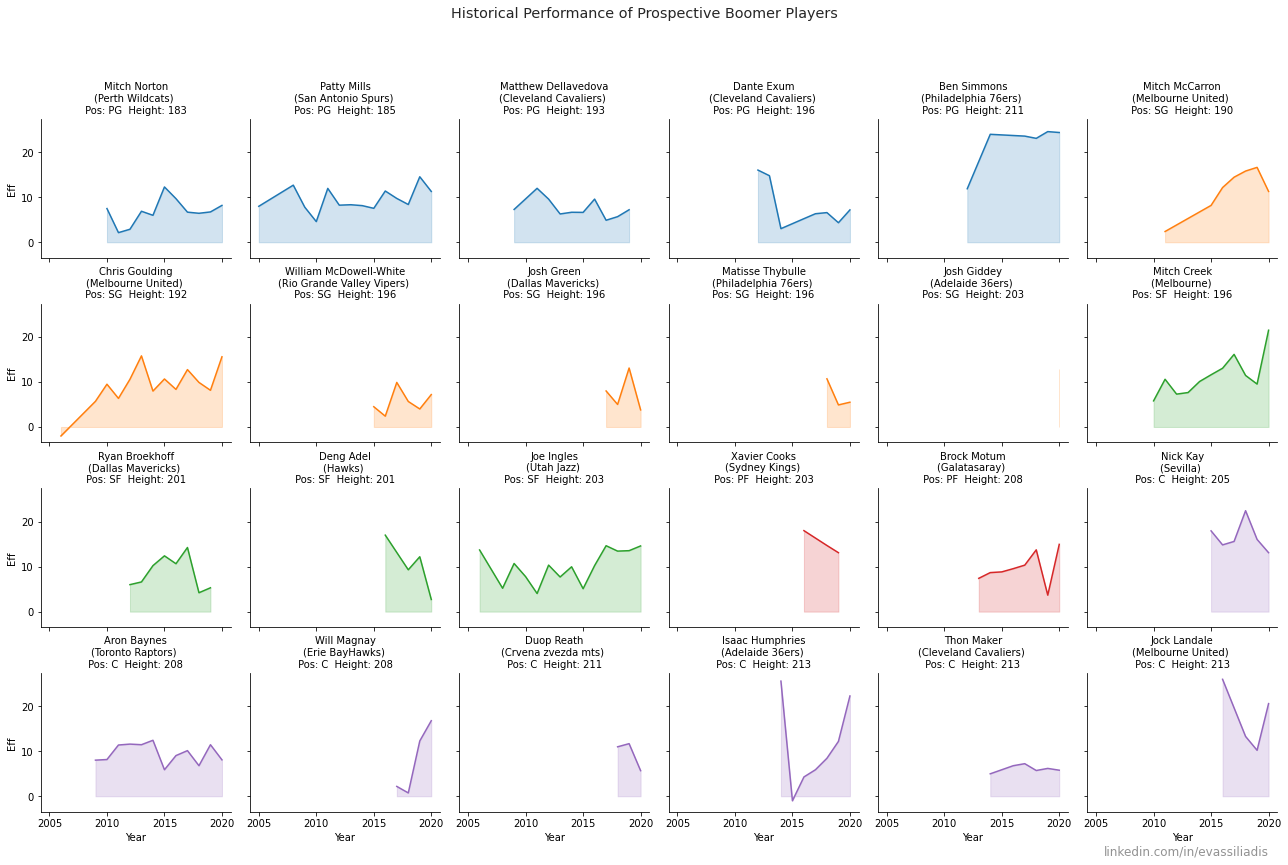

In [16]:

# Create a grid : initialize it
g = sns.FacetGrid(tmp.sort_values(by=['sort','Height','Year']), col='Player-Team', hue='Position', col_wrap=6)
 
# Add the line over the area with the plot function
g = g.map(plt.plot, 'Year', 'Eff')
 
# Fill the area with fill_between
g = g.map(plt.fill_between, 'Year', 'Eff', alpha=0.2).set_titles("{col_name} Player-Team")
 
# Control the title of each facet
g = g.set_titles("{col_name}")
 
# Add a title for the whole plot
plt.subplots_adjust(top=0.85)
sns.set(rc={'figure.figsize':(12,8)})
g = g.fig.suptitle('Historical Performance of Prospective Boomer Players')

plt.text(2020,-13,"linkedin.com/in/evassiliadis",ha='right',alpha=0.5)
# plt.text(2020,-16,"github.com/vass1138/wnbl",ha='right',alpha=0.5)
plt.savefig('boomers_eff_history.png')
plt.show()